## Task 1

In [1]:
import array
import numpy as np
import matplotlib.pyplot as plt


binfpath="/fs/lustre/cita/hqchen/data/z-ifrit-a=0.1401.bin"
with open(binfpath,'rb') as f:
    binarydata=f.read()
lllen=8; flen=4; ilen=4 

N=1024

firstfield=lllen*2+3*ilen

nextfield=firstfield

xHI=array.array('f',binarydata[nextfield+lllen:nextfield+lllen+N**3*flen])
xHI=np.reshape(xHI,(N,N,N),order='F')

nextfield+=lllen+N**3*flen
delta=array.array('f',binarydata[nextfield+lllen:nextfield+lllen+N**3*flen])
delta=np.reshape(delta,(N,N,N),order='F')

nextfield+=lllen+N**3*flen
T=array.array('f',binarydata[nextfield+lllen:nextfield+lllen+N**3*flen])
T=np.reshape(T,(N,N,N),order='F')


/tmp/ipykernel_33404/591149048.py:8: RuntimeWarning: divide by zero encountered in log10
  im2  = ax2.imshow(np.log10(delta[0]))
/tmp/ipykernel_33404/591149048.py:14: RuntimeWarning: divide by zero encountered in log10
  im3 = ax3.imshow(np.log10(T[0]))


Text(0.5, 0.98, 'A plot of a slice of $\\log(T)$')

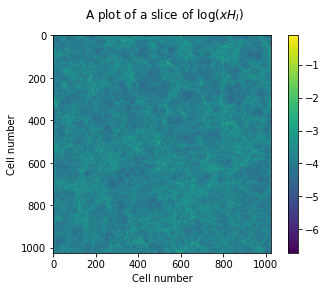

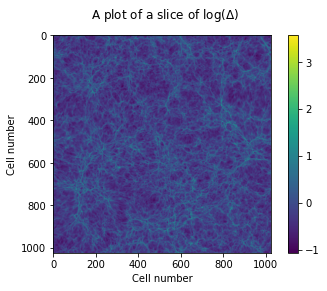

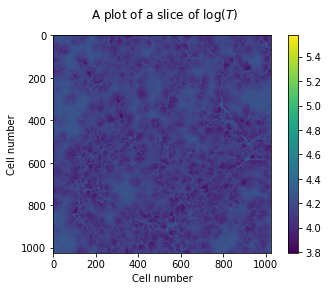

In [2]:
fig1, ax1 = plt.subplots()
im1 = ax1.imshow(np.log10(xHI[0]))
ax1.set(xlabel = "Cell number", ylabel = "Cell number")
fig1.colorbar(im1)
fig1.suptitle("A plot of a slice of $\log(xH_I)$")

fig2, ax2 = plt.subplots()
im2  = ax2.imshow(np.log10(delta[0]))
fig2.colorbar(im2)
ax2.set(xlabel = "Cell number", ylabel = "Cell number")
fig2.suptitle("A plot of a slice of $\log(\Delta)$")

fig3, ax3 = plt.subplots()
im3 = ax3.imshow(np.log10(T[0]))
fig3.colorbar(im3)
ax3.set(xlabel = "Cell number", ylabel = "Cell number")
fig3.suptitle("A plot of a slice of $\log(T)$")

## Task 2

In [3]:
import astropy

In [4]:
from astropy.cosmology import WMAP9 as cosmo
from astropy import units as u
crt_dns = cosmo.critical_density(6)
mean_gas_density = crt_dns*cosmo.Ob(6)
print(mean_gas_density)

1.432778841086186e-28 g / cm3


## Task 3

In [5]:
from astropy.constants import m_p
p = m_p.to(u.g)


In [6]:
sigma  = 4.48e-18*u.cm**2
nH =  (0.76*mean_gas_density/p)
nHI = xHI*nH
nHI = nHI.astype('float128')
cml = (40*0.68)/1024*u.Mpc 
ds = cml*(1/(1+6))
ds = ds.to(u.cm)
dT = sigma * nHI * ds
print(dT.max())

2.910085329003365


In [7]:
print(nHI.max())

5.547614273382351e-05 1 / cm3


## Task 4

In [8]:
from numpy import float128
print(nHI)

[[[6.74571377e-09 6.38827302e-09 5.75865577e-09 ... 1.07600648e-08
   8.21360135e-09 7.04414260e-09]
  [7.67662289e-09 6.92509960e-09 6.13529849e-09 ... 1.13985843e-08
   9.96054794e-09 8.55018278e-09]
  [9.01550923e-09 7.51253726e-09 6.50632348e-09 ... 1.14072840e-08
   1.12177583e-08 1.05493712e-08]
  ...
  [5.40711653e-09 5.72221870e-09 6.19928953e-09 ... 6.03759931e-09
   5.55259971e-09 5.45984546e-09]
  [5.71314507e-09 5.72291681e-09 5.85148463e-09 ... 7.31123873e-09
   6.16871665e-09 5.86614579e-09]
  [6.06233908e-09 5.96980865e-09 5.72571146e-09 ... 9.11899800e-09
   6.97984026e-09 6.31654506e-09]]

 [[5.48221868e-09 5.28250510e-09 5.17780352e-09 ... 8.64833005e-09
   7.15157933e-09 6.03492856e-09]
  [6.61523991e-09 5.69851810e-09 5.04244824e-09 ... 9.86796511e-09
   9.04403130e-09 7.89581023e-09]
  [8.48688053e-09 6.67445255e-09 5.43424594e-09 ... 9.99739669e-09
   1.04928599e-08 1.01232711e-08]
  ...
  [5.35914690e-09 5.90746518e-09 6.73172940e-09 ... 5.94980287e-09
   5.42529

In [8]:
from numpy import float128

new_tau = dT.max()
print(new_tau)
percent = float128(10)
percent = float128(np.exp(-new_tau)*100)
print(percent)

2.910085329003365
5.4471081707766847687


## Task 5

In [10]:
halofpath="/fs/lustre/cita/hqchen/data/hlist_0.14005.list"
halodata = np.loadtxt(halofpath, skiprows = 63) 

halomass = halodata[:, 10]




#mass = []
#for i in range(len(halodata)):
#    mass = np.append(mass, float128(halodata[i][83:94]))

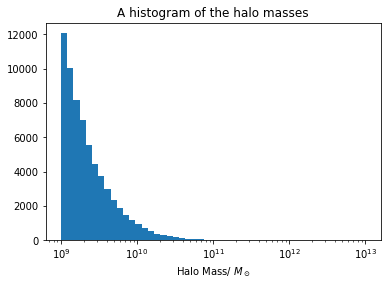

In [11]:
plt.hist(halomass, bins = np.logspace(start =np.log10(10**9), stop = np.log10(10**13)))
plt.gca().set_xscale("log")
plt.title("A histogram of the halo masses")
plt.xlabel("Halo Mass/ $M_\odot$")
plt.show()
